# Análisis Exploratorio de Datos
El siguiente informe muestra el comportamiento de las variables seleccionadas del conjunto de datos *Predict students dropout and academic success* para modelar el comportamiento de el éxito o deserción universitaria a través de una red bayesiana. Con los resultados encontrados cualquier universidad podrá contar con un modelo predictivo con el fin de generar estrategias que le permitan disminuir y prevenir de manera proactiva la deserción. 

Para la lectura y manipulación de los datos se utilizó la librería pandas.

In [31]:
#Importar librerías
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
#Lectura de los datos
df = pd.read_csv('data.csv', sep=';')

## 1. Reconocimiento de la información del data frame
Para iniciar es clave identificar el tamaño y las dimensiones del conjunto de datos con la función shape. Posterior a esto se revisaron las columnas de la tabla con el atributo columns del objeto df.

In [33]:
#Tamaño del data frame
df.size

163688

In [34]:
#Dimensiones del conjunto de datos
df.shape

(4424, 37)

In [35]:
#Columnas del Data Frame
df.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

## 2. Análisis por columna

In [36]:
# Cantidad de valores no nulos en el dataframe y tipo de variables
df.info(memory_usage=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [37]:
#Valores distintos por columna
df.nunique()

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

# 3. Selección de datos de interés

Considerando los posibles intereses del cliente final y lo encontrado en la literatura, se hizo una primera selección de variables:

1. Course
2. Daytime/evening attendance
3. Previous qualification (grade)
4. Mother's qualification
5. Father's qualification
6. Admission grade
7. Displaced
8. Tuition fees up to date
9. Scholarship holder
10. Curricular units 1st sem (evaluations)
11. Curricular units 1st sem (grade)
12. Curricular units 2nd sem (evaluations)
13. Curricular units 2nd sem (grade)
14. Unemployment rate
15. Inflation rate
16. GDP
17. Target

In [38]:
#Visualización rápida para el reconocimiento de los datos utilizando la función head
df_new = df[["Course", "Daytime/evening attendance\t", "Previous qualification (grade)", "Mother's qualification", "Father's qualification", "Admission grade", "Displaced", "Tuition fees up to date", "Scholarship holder", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP", "Target"]]
df_new.head(10)

,Course,Daytime/evening attendance\t,Previous qualification (grade),Mother's qualification,Father's qualification,Admission grade,Displaced,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,171,1,122.0,19,12,127.3,1,1,0,0,0.000000,0,0.000000,10.8,1.4,1.74,Dropout
1,9254,1,160.0,1,3,142.5,1,0,0,6,14.000000,6,13.666667,13.9,-0.3,0.79,Graduate
2,9070,1,122.0,37,37,124.8,1,0,0,0,0.000000,0,0.000000,10.8,1.4,1.74,Dropout
3,9773,1,122.0,38,37,119.6,1,1,0,8,13.428571,10,12.400000,9.4,-0.8,-3.12,Graduate
4,8014,0,100.0,37,38,141.5,0,1,0,9,12.333333,6,13.000000,13.9,-0.3,0.79,Graduate
5,9991,0,133.1,37,37,114.8,0,1,0,10,11.857143,17,11.500000,16.2,0.3,-0.92,Graduate
6,9500,1,142.0,19,38,128.4,1,1,1,9,13.300000,8,14.345000,15.5,2.8,-4.06,Graduate
7,9254,1,119.0,37,37,113.1,1,0,0,5,0.000000,5,0.000000,15.5,2.8,-4.06,Dropout
8,9238,1,137.0,1,1,129.3,0,1,1,8,13.875000,7,14.142857,16.2,0.3,-0.92,Graduate
9,9238,1,138.0,1,19,123.0,1,0,0,9,11.400000,14,13.500000,8.9,1.4,3.51,Dropout


In [143]:
#Transformar variables categóricas
variables_categoricas = ["Course", "Daytime/evening attendance\t", "Mother's qualification", "Father's qualification", "Displaced", "Tuition fees up to date", "Scholarship holder", "Target"]
df_new[variables_categoricas] = df_new[variables_categoricas].astype('category')

C:\Users\jgvm\AppData\Local\Temp\ipykernel_10416\1398112970.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[variables_categoricas] = df_new[variables_categoricas].astype('category')


## 3.1 Filtro adicional de variables continuas

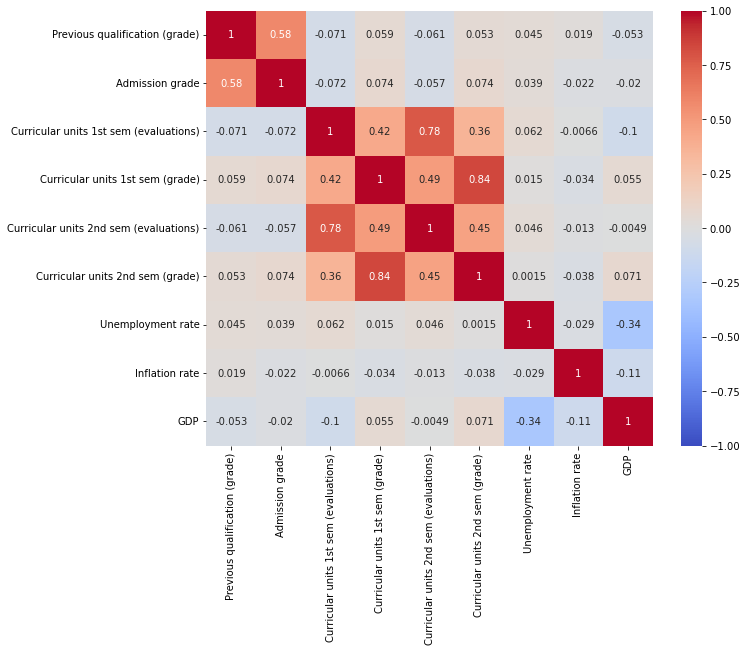

In [141]:
df_continuas = df[["Previous qualification (grade)", "Admission grade", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (grade)", "Curricular units 2nd sem (evaluations)", "Curricular units 2nd sem (grade)", "Unemployment rate", "Inflation rate", "GDP"]]
correlation_matrix = df_continuas.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.show()

Como se puede observar en la figura anterior, exiten variables dentro del modelo actual que están bastante correlacionadas pues su valor de correlación está por encima de 0.5. Por lo tanto, debido a esta alta relación y simulitud que existe entre ellas se procederá a eliminar una de las variables dentro del par correlacionado. 

Entonces, se identificó una correlación de **0.58** entre las variables _Previous qualification (grade)_ y _Admission grade_, una correlación de **0.78** entre las variables _Curricular units 1st sem (evaluations)_ y _Curricular units 2nd sem (evaluations)_, por último, una correlación de **0.84** entre las variables _Curricular units 1st sem (grade)_ y _Curricular units 2nd sem (grade)_.

Una vez identificadas las variables con alta correlación se procede a retirar una de ellas dentro del par de variables. Según lo anterior, se dio prioridad a las variables que pueden brindar información de forma temprana según las necesidades del cliente que, en este caso, es la universidad. En este orden de ideas, se decidió dejar dentro de modelo las variables  _Previous qualification (grade)_,  _Curricular units 1st sem (evaluations)_ y _Curricular units 1st sem (grade)_ y sacar del modelo las variables _Admission grade_, Curricular units 2nd sem (evaluations)_ y _Curricular units 2nd sem (grade)_. Con estas variables dentro del modelo se pretende tomar información desde una fase temprana del estudiantes pues al obtener la información del primer semestre se podrá inferir de una vez sin necesidad de que el estudiante complete el segundo segundo semestre ya que ambas variables están altamente correlacionadas.



In [210]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_final['Target'], df_final['Mother\'s qualification'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_final['Target'], df_final['Mother\'s qualification'], normalize='columns') * 100
normalized_by_column


Mother's qualification,1,2,3,4,5,6,9,10,11,12,...,35,36,37,38,39,40,41,42,43,44
Target,,,,,,,,,,,,,,,,,,,,,
Dropout,28.063611,24.096386,31.735160,16.326531,38.095238,75.0,62.5,66.666667,66.666667,52.380952,...,66.666667,66.666667,37.958375,24.911032,50.0,33.333333,33.333333,50.0,25.0,100.0
Enrolled,19.083255,27.710843,23.059361,30.612245,23.809524,0.0,0.0,0.000000,0.000000,7.142857,...,0.000000,0.000000,16.749257,16.192171,25.0,11.111111,0.000000,0.0,25.0,0.0
Graduate,52.853134,48.192771,45.205479,53.061224,38.095238,25.0,37.5,33.333333,33.333333,40.476190,...,33.333333,33.333333,45.292369,58.896797,25.0,55.555556,66.666667,50.0,50.0,0.0


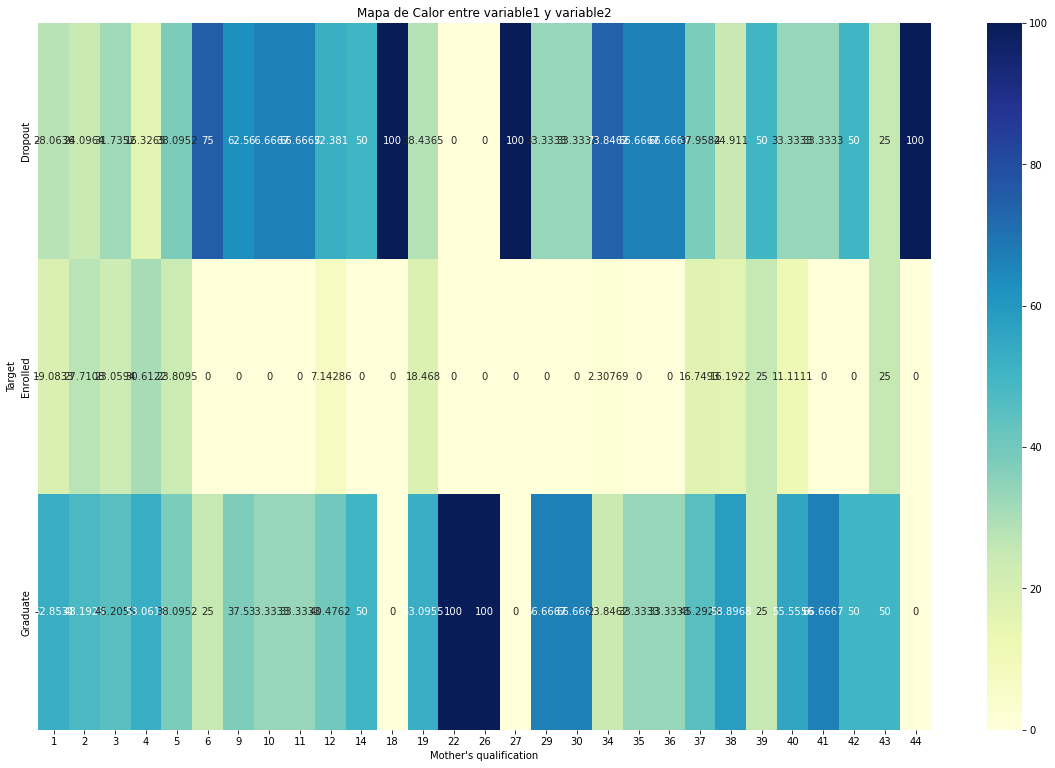

In [211]:
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre variable1 y variable2')
plt.show()

In [212]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_final['Target'], df_final['Mother\'s qualification'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)


0.15694880104029407


In [214]:
# Supongamos que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_final['Target'], df_final['Mother\'s qualification'])
contingency_table.iloc[0]

# Normaliza por columnas para obtener porcentajes.
normalized_by_column = pd.crosstab(df_final['Target'], df_final['Father\'s qualification'], normalize='columns') * 100
normalized_by_column

Father's qualification,1,2,3,4,5,6,9,10,11,12,...,35,36,37,38,39,40,41,42,43,44
Target,,,,,,,,,,,,,,,,,,,,,
Dropout,31.084071,32.352941,31.914894,35.897436,55.555556,100.0,20.0,100.0,40.0,36.842105,...,100.0,62.5,35.732010,23.789174,40.0,60.0,50.0,0.0,0.0,100.0
Enrolled,19.026549,36.764706,21.985816,17.948718,16.666667,0.0,0.0,0.0,0.0,10.526316,...,0.0,0.0,16.459884,18.091168,35.0,0.0,50.0,0.0,0.0,0.0
Graduate,49.889381,30.882353,46.099291,46.153846,27.777778,0.0,80.0,0.0,60.0,52.631579,...,0.0,37.5,47.808106,58.119658,25.0,40.0,0.0,100.0,100.0,0.0


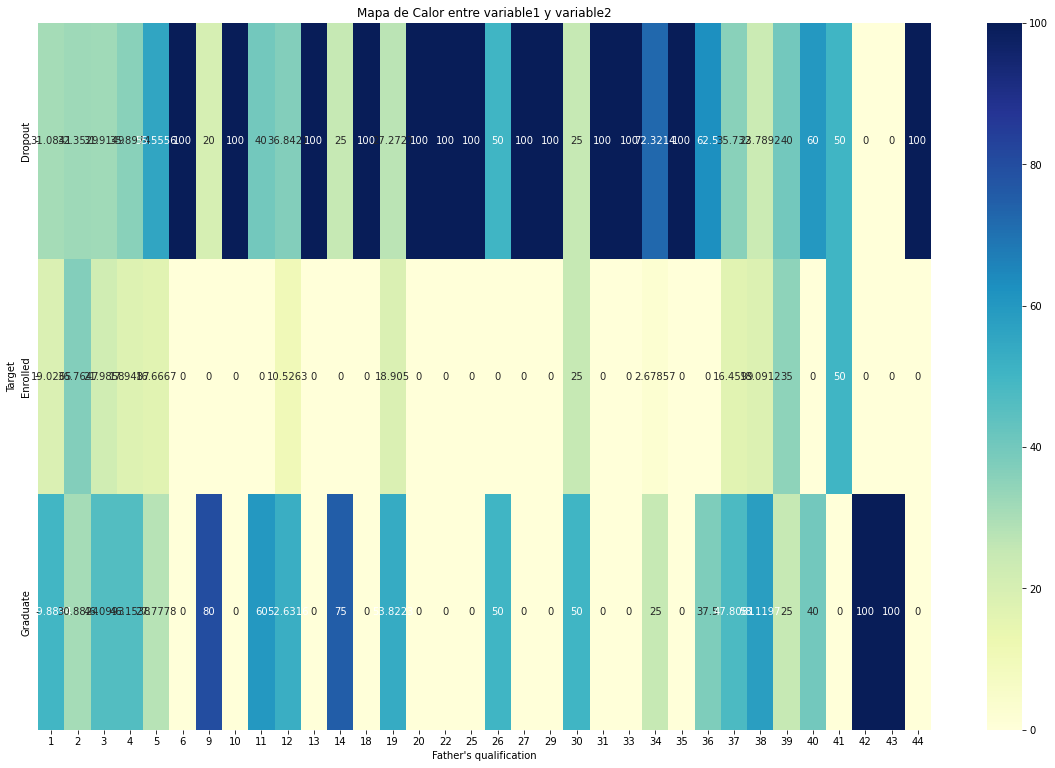

In [215]:
plt.figure(figsize=(20, 13))
sns.heatmap(normalized_by_column, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Mapa de Calor entre variable1 y variable2')
plt.show()

In [198]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np

# Suponiendo que tu DataFrame se llama 'df' y las columnas son 'variable1' y 'variable2'
contingency_table = pd.crosstab(df_final['Target'], df_final['Father\'s qualification'])

# Calcula el estadístico chi-cuadrado
chi2, p, _, _ = chi2_contingency(contingency_table)

# Calcula la V de Cramér
n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape)-1  # -1 para restar los encabezados/etiquetas de fila o columna
cramers_v = np.sqrt(chi2 / (n * min_dim))

print(cramers_v)

0.1594664984039091


## 3.2 Variables finales


1. Course
2. Daytime/evening attendance
3. Previous qualification (grade)
4. Displaced
5. Tuition fees up to date
6. Scholarship holder
7. Curricular units 1st sem (evaluations)
8. Curricular units 1st sem (grade)
9. Unemployment rate
10. Inflation rate
11. GDP
12. Target


## 3.3 Modelo Final

In [149]:
# Nuevo Modelo
df_final = df_new[["Course", "Daytime/evening attendance\t", "Previous qualification (grade)", "Mother's qualification", "Father's qualification", "Displaced", "Tuition fees up to date", "Scholarship holder", "Curricular units 1st sem (evaluations)", "Curricular units 1st sem (grade)", "Unemployment rate", "Inflation rate", "GDP", "Target"]]
df_final.head(10)


,Course,Daytime/evening attendance\t,Previous qualification (grade),Mother's qualification,Father's qualification,Displaced,Tuition fees up to date,Scholarship holder,Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Unemployment rate,Inflation rate,GDP,Target
0,171,1,122.0,19,12,1,1,0,0,0.000000,10.8,1.4,1.74,Dropout
1,9254,1,160.0,1,3,1,0,0,6,14.000000,13.9,-0.3,0.79,Graduate
2,9070,1,122.0,37,37,1,0,0,0,0.000000,10.8,1.4,1.74,Dropout
3,9773,1,122.0,38,37,1,1,0,8,13.428571,9.4,-0.8,-3.12,Graduate
4,8014,0,100.0,37,38,0,1,0,9,12.333333,13.9,-0.3,0.79,Graduate
5,9991,0,133.1,37,37,0,1,0,10,11.857143,16.2,0.3,-0.92,Graduate
6,9500,1,142.0,19,38,1,1,1,9,13.300000,15.5,2.8,-4.06,Graduate
7,9254,1,119.0,37,37,1,0,0,5,0.000000,15.5,2.8,-4.06,Dropout
8,9238,1,137.0,1,1,0,1,1,8,13.875000,16.2,0.3,-0.92,Graduate
9,9238,1,138.0,1,19,1,0,0,9,11.400000,8.9,1.4,3.51,Dropout


# 4. Discretización 

## 4.1 Variables Continuas

In [152]:
#Descripción de variables continuas
df_final.describe()

,Previous qualification (grade),Curricular units 1st sem (evaluations),Curricular units 1st sem (grade),Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,132.613314,8.299051,10.640822,11.566139,1.228029,0.001969
std,13.188332,4.179106,4.843663,2.663850,1.382711,2.269935
min,95.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,125.000000,6.000000,11.000000,9.400000,0.300000,-1.700000
50%,133.100000,8.000000,12.285714,11.100000,1.400000,0.320000
75%,140.000000,10.000000,13.400000,13.900000,2.600000,1.790000
max,190.000000,45.000000,18.875000,16.200000,3.700000,3.510000


### 4.1.1 Curricular units 1st sem (evaluations)

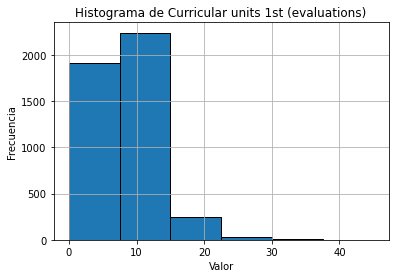

In [110]:
# Crear un histograma para columna_A
frecuencia, bins, p = plt.hist(df_final["Curricular units 1st sem (evaluations)"], bins = 6, edgecolor='black')  # Ajusta el número en 'bins' según cómo quieras los intervalos
plt.title('Histograma de Curricular units 1st (evaluations)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [111]:
frecuencia

array([1.909e+03, 2.240e+03, 2.420e+02, 2.700e+01, 4.000e+00, 2.000e+00])

In [112]:
bins

array([ 0. ,  7.5, 15. , 22.5, 30. , 37.5, 45. ])

Se pueden tomar 6 clases para la variable _Curricular units 1st sem (evaluations)_ y definirlas de la siguiente forma:

* (0 , 7.5) -> Muy Bajo (MB)
* (7.5 , 15) -> Bajo (B)
* (15 , 22.5) -> Intermedio Bajo (IB)
* (22.5 , 30) -> Intermadio Alto (IA)
* (30 , 37.5) -> Alto (A)
* (37.5 , 45) -> Muy Alto (MA)

En nuestro curso se realizan minimo 15 talleres y 3 proyectos, con lo cual, son 18 evaluaciones que se realizan dentro del curso. (SE TOMA COMO REFERENCIA)

In [113]:
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['MB', 'B', 'IB', 'IA', 'A', 'MA']

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Curricular units 1st sem (evaluations) new'] = pd.cut(df_final['Curricular units 1st sem (evaluations)'], bins = bins, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Curricular units 1st sem (evaluations) new']

0       MB
1       MB
2       MB
3        B
4        B
        ..
4419    MB
4420    MB
4421     B
4422    MB
4423     B
Name: Curricular units 1st sem (evaluations) new, Length: 4424, dtype: category
Categories (6, object): ['MB' < 'B' < 'IB' < 'IA' < 'A' < 'MA']

### 4.1.2 Inflation rate


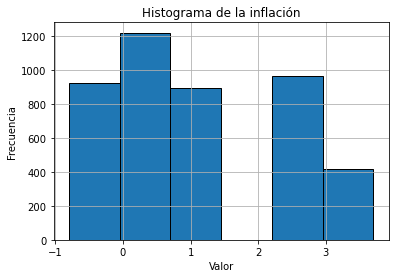

In [126]:
frecuencia, bins, p = plt.hist(df_final["Inflation rate"], bins = 6, edgecolor='black')  # Ajusta el número en 'bins' según cómo quieras los intervalos
plt.title('Histograma de la inflación')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [124]:
frecuencia

array([2144.,  893., 1387.])

In [125]:
bins

array([-0.8,  0.7,  2.2,  3.7])

Para el caso de la inflación se tomó como referencia los valores objetivo del banco de la republica de Colombia. Según la junta directiva del banco central del pais la meta de inflación anual se encuentra en un 3% y el rango aceptable se encuentra dentro del +/-1%. Según este orden de ideas, se discretizará esta variable del modelo (_Inflation rate_) de la siguiente forma:

* (-1 , 1) -> Baja (B)
* (1 , 3) -> Media (M)
* (3 , 4) -> Alta (A)

https://www.banrep.gov.co/es/glosario/meta-inflacion#:~:text=En%20Colombia%20la%20meta%20de,encuentra%20en%20el%203%20%25%20anual.

In [116]:
#Se crea la lista con los rangos númericos a discretizar
bins = [-1, 1, 3, 4]
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['B', 'M', 'A'] 

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Inflation rate new'] = pd.cut(df_final['Inflation rate'], bins = bins, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Inflation rate new']

C:\Users\jgvm\AppData\Local\Temp\ipykernel_10416\3597605696.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Inflation rate new'] = pd.cut(df_final['Inflation rate'], bins = bins, labels = labels, right = True,  include_lowest=True)


0       M
1       B
2       M
3       B
4       B
       ..
4419    M
4420    B
4421    B
4422    B
4423    A
Name: Inflation rate new, Length: 4424, dtype: category
Categories (3, object): ['B' < 'M' < 'A']

### 4.1.3 Previous qualification (grade)

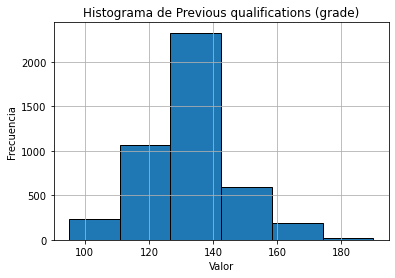

In [127]:
frecuencia, bins, p = plt.hist(df_final["Previous qualification (grade)"], bins = 6, edgecolor='black')  
plt.title('Histograma de Previous qualifications (grade)')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [128]:
frecuencia

array([ 237., 1069., 2326.,  588.,  184.,   20.])

In [139]:
bins
4.6*40

184.0

El sistema actual de valoración de los estudiantes en Colombia se rige por el decreto 1920 del 2009. En este se estipula 4 categorias en los que se clasifican los estudiantes según sus resultados academicos. A continuación se presentan dichas categorias y su representación cuantitativa:

* (0.0, 2.9) -> Desempeño Bajo
* (3.0, 3.9) -> Desempeño Basico
* (4.0, 4.5) -> Desemepeño Alto
* (4.6, 5.0) -> Desempeño Superior

Según lo anterior, se procederá a clasificar de la misma forma la variable continua _Previous quailification (grade)_ que se encuentra dentro del modelo. Por lo tanto, será necesario ajustar los rangos cualitativos respecto a nuestra variable ya que esta tiene un rango entre 0 a 200 puntos. Según este orden de ideas, la clasificación cualitativa estará representada de la siguiente forma:

* (0.0, 116) -> Desempeño Bajo
* (117, 156) -> Desempeño Basico
* (157, 180) -> Desempeño Alto
* (181, 200) -> Desemepeño Superior


https://www.mineducacion.gov.co/1621/articles-213769_archivo_pdf_evaluacion.pdf

In [140]:
#Se crea la lista con las clases de la nueva variable discretizada
labels = ['Desemp. Bajo', 'Desemp. Basico', 'Desemp. Alto', 'Desemp. Superior']
bins = [0, 116, 156, 180, 200]

#Se crea una nueva columna discretizdada dentro del dataframe final 
df_final['Previous qualification (grade) new'] = pd.cut(df_final['Previous qualification (grade)'], bins = bins, labels = labels, right = True,  include_lowest=True)

#Visualización de la nueva columna discretizada
df_final['Previous qualification (grade) new']

C:\Users\jgvm\AppData\Local\Temp\ipykernel_10416\3833586287.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Previous qualification (grade) new'] = pd.cut(df_final['Previous qualification (grade)'], bins = bins, labels = labels, right = True,  include_lowest=True)


0       Desemp. Basico
1         Desemp. Alto
2       Desemp. Basico
3       Desemp. Basico
4         Desemp. Bajo
             ...      
4419    Desemp. Basico
4420    Desemp. Basico
4421    Desemp. Basico
4422      Desemp. Alto
4423    Desemp. Basico
Name: Previous qualification (grade) new, Length: 4424, dtype: category
Categories (4, object): ['Desemp. Bajo' < 'Desemp. Basico' < 'Desemp. Alto' < 'Desemp. Superior']

## 4.2 Variables Discretas

### 4.2.1 Course

In [151]:
# Valores unicos 
df_final["Course"].unique()

[171, 9254, 9070, 9773, 8014, ..., 9556, 9147, 9003, 33, 9119]
Length: 17
Categories (17, int64): [33, 171, 8014, 9003, ..., 9670, 9773, 9853, 9991]

In [109]:
# Frecuencia de los valores unicos
df_final["Course"].value_counts()

9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: Course, dtype: int64

### 4.2.1.1 Reducción de Categorias de la variable Course

Al aplicar la función _unique()_ sobre la columna de la variable _Course_ se logra identificar que existen **17** categorias. Por lo tanto, para reducir la cantidad de niveles se procederá a crear nuevas categorias donde exista alguna relación entre las demas y así reducir el número de niveles para esta variable categorica.

Entonces, al visualizar detalladamente las categorias actuales se logró identificar 5 nuevas categorias en donde se podía reagrupar las categorias actuales. Lo anterior se puede observar de la siguiente forma:

1. Ciencias Exactas (1):
    - Biofuel Production Technologies (33)
    - Informatics Engineering (9119)
    - Management (9147)
    - Management (evening attendance) (9991)
    

2. Diseño (2):
    - Animation and Multimedia Design (171)
    - Communication Design (9070)
    - Advertising and Marketing Management (9670)
    

3. Ciencias Sociales (3):
    - Social Service (evening attendance) (8014)
    - Social Service (9238)
    - Tourism (9254)
    - Journalism and Communication (9773) 
    - Basic Education (9853)
    
    
4. Ciencias Agrarias (4):
    - Agronomy (9003)
    - Equinculture (9130)
    
    
5. Ciencias de la Salud (5):
    - Veterinary Nursing (9085)
    - Nursing (9500)
    - Oral Hygiene (9556)

In [159]:
# Actualización de la nueva columna de Course reducida en categorias
nuevas_categorias = {"Ciencias Exactas":[33,9119,9147,9991], "Diseño":[171,9070,9670], "Ciencias Sociales":[8014,9238,9254,9773,9853], "Ciencias Agrarias":[9003,9130], "Ciencias de la Salud":[9085, 9500,9556]}

df['Course new'] = df['Course'].copy()

# Itera sobre las llaves y valores del diccionario
for nuevo_valor, lista_valores in nuevas_categorias.items():
    # Usa el método 'replace' para actualizar los valores en la nueva columna
    df['Course new'] = df['Course new'].replace(lista_valores, nuevo_valor)

# Verifica el resultado
print(df[['Course new','Course']])

                Course new  Course
0                   Diseño     171
1        Ciencias Sociales    9254
2                   Diseño    9070
3        Ciencias Sociales    9773
4        Ciencias Sociales    8014
...                    ...     ...
4419     Ciencias Sociales    9773
4420     Ciencias Sociales    9773
4421  Ciencias de la Salud    9500
4422      Ciencias Exactas    9147
4423     Ciencias Sociales    9773

[4424 rows x 2 columns]
